## Shannon entropy of image


#### Import image

In [18]:
import sys
import os
pwd = os.getcwd()
root = pwd.split("home", 1)[0]
modelling_home = root + 'home/Documents/modelling'
modelling_ephemeral = root + 'ephemeral/Documents/modelling'
modulepath = modelling_home + '/3954/modules'
sys.path.append(modulepath)
from numerical_solvers_variableboundary import *
from PIL import Image, ImageDraw
import numpy as np
from numpy import asarray
import pickle

def plot(parID,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( filename, "rb" ) )
    plot_redgreen_contrast(final_concentration,L,mechanism,shape,filename,savefig_path,parID=parID,scale_factor=x_gridpoints,save_figure=save_figure)


def entropy(parID,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( filename, "rb" ) )
    
    if show_fig==True:
        plot(parID)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    H_red=0
    H_green=0

    for counti,i in enumerate(pixels_red):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_red -= pixelH
            
    for counti,i in enumerate(pixels_green):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_green -= pixelH
    H = np.mean([H_red,H_green])
    return H_red,H_green,H


In [49]:
parID_list = [20580,29513,4781,20807,27915,9653,11486]
entropy_dict = {}
for parID in parID_list:
    entropy_dict[parID]=entropy(parID)
entropy_dict
entropy_dict = sorted(entropy_dict.items(), key=lambda x: x[1][2],reverse=True)
entropy_dict



[(9653, (11.975229551945098, 11.979237155685384, 11.97723335381524)),
 (11486, (11.978609122261672, 11.9315423032252, 11.955075712743437)),
 (20580, (10.88997251983977, 10.847470629741373, 10.868721574790571)),
 (20807, (10.76740047708033, 10.75839594693732, 10.762898212008825)),
 (27915, (10.945695824723552, 10.451476024365641, 10.698585924544597)),
 (29513, (9.887492236179677, 10.952978487269045, 10.42023536172436)),
 (4781, (8.349360349000634, 11.432761262690084, 9.89106080584536))]

9653 (11.975229551945098, 11.979237155685384, 11.97723335381524)


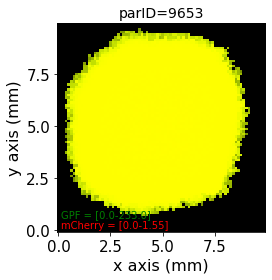

11486 (11.978609122261672, 11.9315423032252, 11.955075712743437)


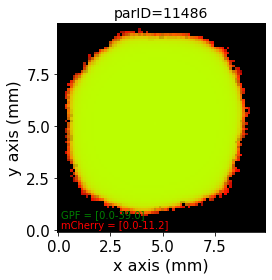

20580 (10.88997251983977, 10.847470629741373, 10.868721574790571)


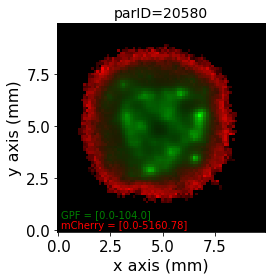

20807 (10.76740047708033, 10.75839594693732, 10.762898212008825)


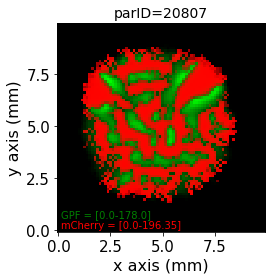

27915 (10.945695824723552, 10.451476024365641, 10.698585924544597)


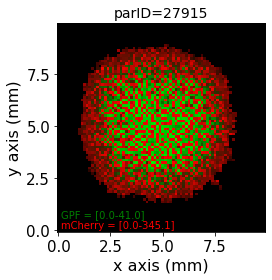

29513 (9.887492236179677, 10.952978487269045, 10.42023536172436)


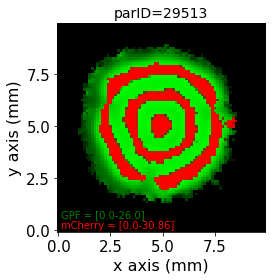

4781 (8.349360349000634, 11.432761262690084, 9.89106080584536)


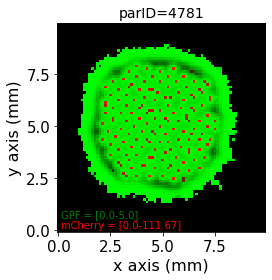

In [50]:
for keys,items in entropy_dict:
    print (keys,items)
    plot(keys)